In [ ]:
# manual anno for sub-types?

In [5]:
library(Seurat)
library(dplyr)

In [19]:
# get list of samples
stages = c(rep('stage23', 2), rep(c('stage28', 'stage32'), each = 3))
samples = c('sample3', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

In [20]:
# get counts and mtd
cls_list = c('erythroid', 'endocardial', 'vCM_left', 'precursor', 'erythroid', 'vCM_right', 
             'vCM_CS', 'aCM', 'myoIntFibro', 'SMC', 'valve_endothelial', 'AVN_pacemaker', 'myoIntFibro', 
             'AdvFibro', 'vCM_right', 'endocardial', 'SMC', 'vCM_left', 'endocardial', 'epicardial', 
             'erythroid', 'pericyte', 'SAN_pacemaker', 'Epi-derived', 'SAN_pacemaker', 'Epi-derived', 
             'vCM_right', 'Epi-derived', 'epicardial', 'non-WBC', 'WBC', 'neural_crest', 'neural_crest')

length(unique(cls_list))

[1] 19

In [21]:
# gene lists
m1 = read.delim('~/septation/markers/Bayraktar_marker_genes.txt', sep = '\t')
m1[1:2,]

Compartment    Subtype              Cluster                  
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft 
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesRight
  Gene                                                                                                
1 TNNT2,ACTN2,LDB3,CSRP3,SMPX,KCNMB2,PCDH7,RYR3,PANCR,MBP,NAV3,PITX2,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2  
2 TNNT2,ACTN2,LDB3,CSRP3,SMPX,NTM,ROR1,KIF26B,PLC1,ANGPT1,BRINP3,BMP10,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2
  Comments                                                
1 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al
2 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al

In [22]:
ctypes = m1$Cluster
top_markers = c()

for(ii in 1:length(ctypes)){
    temp = data.frame(compartment = m1$Compartment[ii], 
                      subtype = m1$Subtype[ii], cluster = m1$Cluster[ii],
                      gene = unique(unlist(stringr::str_split(m1$Gene[ii], ','))))
    top_markers = rbind(top_markers, temp)
}
top_markers[1:3,]

compartment    subtype              cluster                  gene 
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft TNNT2
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft ACTN2
3 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft LDB3

In [23]:
tab1 = read.delim('chicken_manual_anno1.csv', sep = ',')
tab1$consensus_type = tab1$anno1
tab1[1:2,]

stage           cluster anno1       anno2       anno3       confident
1 stage23_sample3 0       endocardial endocardial endocardial yes      
2 stage23_sample3 1       erythroid   erythroid               yes      
  consensus_type
1 endocardial   
2 erythroid

In [24]:
tab1[tab1$anno2=='SMC',]

stage cluster anno1 anno2 anno3 confident consensus_type

In [25]:
# Kanemaru cell types?
newdf = c()

for(id1 in 1:length(samples)){
    currstage1 = stages[id1]
    currsmp1 = samples[id1]
    temp = read.delim(paste0('annotations/', currstage1, '_', currsmp1, '_Kanemaru_celltypes.csv'),
                sep = ',')
    newdf = rbind(newdf, temp)
}
newdf[1,]

barcode                            class                               
1 stage23_sample3_AAACCCAAGTAACAGT-1 endothelial cell of lymphatic vessel
  class_score class_enrichment celltype   celltype_score celltype_enrichment
1 2.821252    1.490557         unassigned 3.301225       1                  
  final_celltype
1 unassigned

In [26]:
df1 = read.delim('chicken_scVI_clusters.csv', sep = ',')
dim(df1)
df1[1:2,]

[1] 50547    12

X                                  orig.ident nCount_RNA nFeature_RNA species
1 stage23_sample3_AAACCCAAGTAACAGT-1 stage23    5044       2506         chicken
2 stage23_sample3_AAACCCACAACAGAGC-1 stage23    7014       2721         chicken
  dataset         consensus_type integrated_snn_res.1 seurat_clusters
1 stage23_sample3 endocardial    18                   18             
2 stage23_sample3 cardiomyocyte   1                    1             
  X_scvi_batch X_scvi_labels leiden
1 1            0             1     
2 1            0             3

In [27]:
m1 = df1 %>% count(leiden) 
m2 = df1 %>% group_by(consensus_type, leiden) %>% reframe(count = n())
m2$prop = m2$count/m1$n[match(m2$leiden, m1$leiden)]
m2

consensus_type leiden count prop        
1   WBC             7        1  0.0004894763
2   WBC            17        1  0.0019762846
3   WBC            19      295  0.8939393939
4   WBC            23        1  0.0065789474
5   cardiomyocyte   0     7130  0.9987393192
6   cardiomyocyte   1        7  0.0011214354
7   cardiomyocyte   2       10  0.0017050298
8   cardiomyocyte   3     4330  0.9976958525
9   cardiomyocyte   4        1  0.0002368546
10  cardiomyocyte   5     3650  0.9978130126
11  cardiomyocyte   6       66  0.0241139934
12  cardiomyocyte   7        5  0.0024473813
13  cardiomyocyte   8       13  0.0066906845
14  cardiomyocyte   9        3  0.0015948963
15  cardiomyocyte  10        2  0.0011389522
16  cardiomyocyte  11        6  0.0038486209
17  cardiomyocyte  12        3  0.0022779043
18  cardiomyocyte  13     1133  0.9991181658
19  cardiomyocyte  14        1  0.0010471204
20  cardiomyocyte  15       95  0.0998948475
21  cardiomyocyte  16      608  0.9743589744
22  cardiomyocyte  17       88  0.1739130435
23  cardiomyocyte  18       16  0.0373831776
24  cardiomyocyte  19        3  0.0090909091
25  cardiomyocyte  21      242  0.8642857143
26  cardiomyocyte  23       42  0.2763157895
27  endocardial     0        1  0.0001400756
28  endocardial     1     6209  0.9947132329
29  endocardial     2        9  0.0015345269
30  endocardial     3        1  0.0002304147
⋮   ⋮              ⋮      ⋮     ⋮           
104 neural_crest   12        3  0.0022779043
105 neural_crest   15        1  0.0010515247
106 neural_crest   20      292  0.9511400651
107 neural_crest   23       57  0.3750000000
108 non-WBC         2       17  0.0028985507
109 non-WBC         6        1  0.0003653635
110 non-WBC         7        2  0.0009789525
111 non-WBC        12        1  0.0007593014
112 non-WBC        18      374  0.8738317757
113 non-WBC        19       23  0.0696969697
114 precursor       0        2  0.0002801513
115 precursor       1        2  0.0003204101
116 precursor       2       19  0.0032395567
117 precursor       3        3  0.0006912442
118 precursor       4        6  0.0014211274
119 precursor       5        4  0.0010934937
120 precursor       6     2376  0.8681037632
121 precursor       7        3  0.0014684288
122 precursor       8       13  0.0066906845
123 precursor       9        3  0.0015948963
124 precursor      10        5  0.0028473804
125 precursor      11        1  0.0006414368
126 precursor      12       13  0.0098709188
127 precursor      14        1  0.0010471204
128 precursor      16        1  0.0016025641
129 precursor      18        1  0.0023364486
130 precursor      19        6  0.0181818182
131 precursor      20        2  0.0065146580
132 precursor      21       28  0.1000000000
133 precursor      23        4  0.0263157895

In [28]:
sc1 = readRDS('chicken_integrated_ssSTACAS_v2.rds')
sc1

An object of class Seurat 
19007 features across 50547 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [29]:
# Kanemaru cell types
sc1$class = newdf$class[match(rownames(sc1@meta.data), newdf$barcode)]
sc1$subclass = newdf$celltype[match(rownames(sc1@meta.data), newdf$barcode)]

# manual anno
for(id3 in 1:length(samples)){
    
    # add simple cell anno
    tab2 = tab1[which(tab1$stage == paste0(stages[id3], '_', samples[id3])),]
    sc1$anno2 = tab2$anno2[match(sc1$old_clusters, tab2$cluster)]
     
}

In [48]:
sc1$leiden = df1$leiden[match(rownames(sc1@meta.data), df1$X)]

In [49]:
sc1@meta.data[1:3,]

orig.ident nCount_RNA nFeature_RNA species
stage23_sample3_AAACCCAAGTAACAGT-1 stage23    5044       2506         chicken
stage23_sample3_AAACCCACAACAGAGC-1 stage23    7014       2721         chicken
stage23_sample3_AAACCCACATCGATAC-1 stage23    1350       1009         chicken
                                   dataset         consensus_type
stage23_sample3_AAACCCAAGTAACAGT-1 stage23_sample3 endocardial   
stage23_sample3_AAACCCACAACAGAGC-1 stage23_sample3 cardiomyocyte 
stage23_sample3_AAACCCACATCGATAC-1 stage23_sample3 erythroid     
                                   integrated_snn_res.1 seurat_clusters
stage23_sample3_AAACCCAAGTAACAGT-1 15                   15             
stage23_sample3_AAACCCACAACAGAGC-1 17                   17             
stage23_sample3_AAACCCACATCGATAC-1 4                    4              
                                   old_clusters
stage23_sample3_AAACCCAAGTAACAGT-1 0           
stage23_sample3_AAACCCACAACAGAGC-1 3           
stage23_sample3_AAACCCACATCGATAC-1 1           
                                   class                               
stage23_sample3_AAACCCAAGTAACAGT-1 endothelial cell of lymphatic vessel
stage23_sample3_AAACCCACAACAGAGC-1 regular ventricular cardiac myocyte 
stage23_sample3_AAACCCACATCGATAC-1 regular ventricular cardiac myocyte 
                                   subclass      anno2       leiden
stage23_sample3_AAACCCAAGTAACAGT-1 unassigned    erythroid   1     
stage23_sample3_AAACCCACAACAGAGC-1 vCM3_stressed vCM         3     
stage23_sample3_AAACCCACATCGATAC-1 vCM4          endocardial 2

In [31]:
table(sc1$subclass[sc1$seurat_clusters==23])
cls_list


           aCM4       CD4+T_Th2     CD8+T_cytox   EC10_CMC-like         EC5_art 
              5               1              46               1               1 
EC7_endocardial     EC9_FB-like             FB2   FB4_activated             FB6 
              7               6             170              13              88 
            gdT       NC1_glial  NC2_glial_NGF+        PC1_vent       PC2_atria 
              6               1              44               2               2 
     SAN_P_cell      unassigned    unclassified            vCM1            vCM2 
              8              15               6              11             121 
  vCM3_stressed            vCM4            vCM5 
             39              95              26 

[1] "erythroid"         "endocardial"       "vCM_left"         
 [4] "precursor"         "erythroid"         "vCM_right"        
 [7] "vCM_CS"            "aCM"               "myoIntFibro"      
[10] "SMC"               "valve_endothelial" "AVN_pacemaker"    
[13] "myoIntFibro"       "AdvFibro"          "vCM_right"        
[16] "endocardial"       "SMC"               "vCM_left"         
[19] "endocardial"       "epicardial"        "erythroid"        
[22] "pericyte"          "SAN_pacemaker"     "Epi-derived"      
[25] "SAN_pacemaker"     "Epi-derived"       "vCM_right"        
[28] "Epi-derived"       "epicardial"        "non-WBC"          
[31] "WBC"               "neural_crest"      "neural_crest"

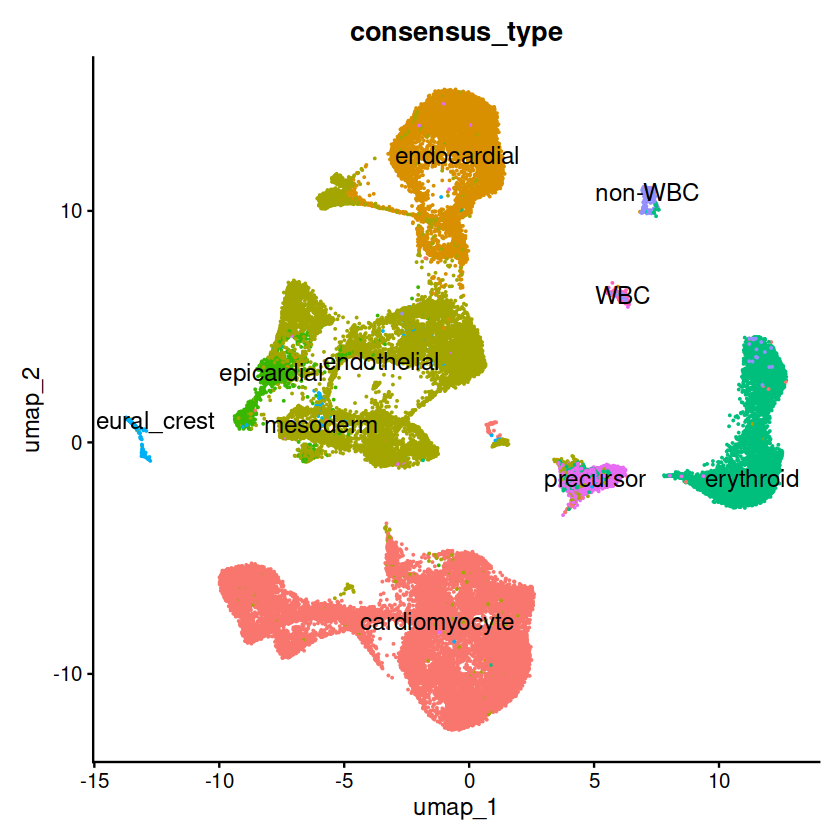

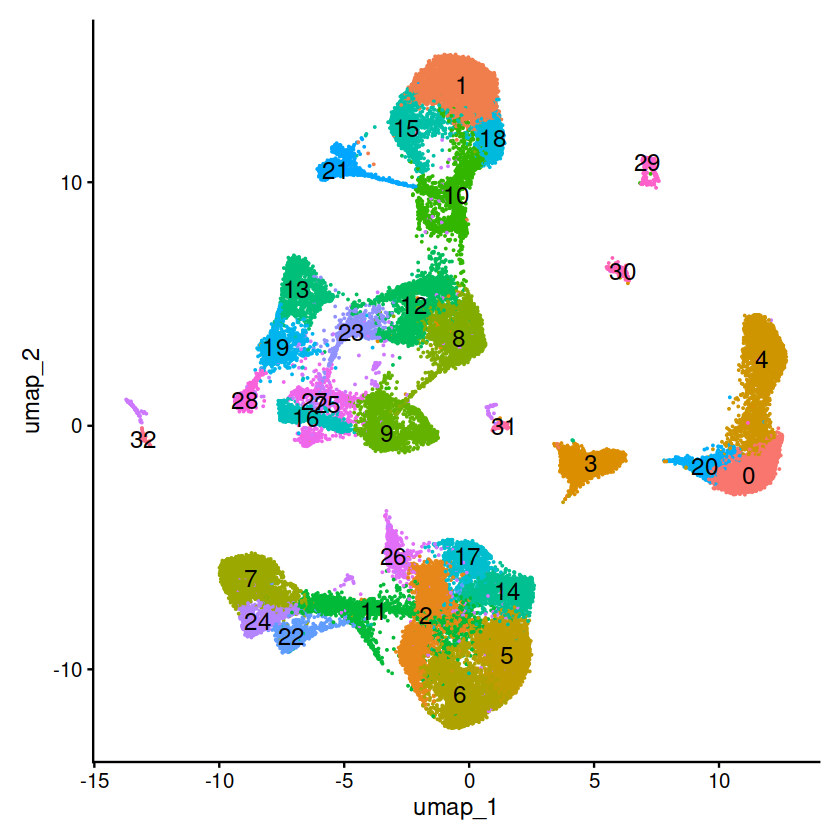

In [32]:
DimPlot(sc1, reduction = 'umap', group.by = 'consensus_type', label = T, label.size = 5) + NoLegend()
DimPlot(sc1, reduction = 'umap', label = T, label.size = 5) + NoLegend()

In [33]:
exp_mat = LayerData(sc1, assay = 'RNA', layer = 'counts')

In [34]:
# cls_list = c(7,24,22, 11,2,26, 17,14,6,5)
# cls_list = c(1,10,15,18)
# cls_list = c(8,12,13,23, 9,16,25,27, 21)

cls_list = c(0,3,5,13,16,21)

In [50]:
# for subset of data
# ids = which(sc1$seurat_clusters %in% cls_list)
ids = which(sc1$leiden %in% cls_list)
sce = CreateSeuratObject(counts = exp_mat[,ids],
                        meta.data = sc1@meta.data[ids,])
sce <- NormalizeData(sce)

Normalizing layer: counts



In [51]:
# recluster data

sce <- FindVariableFeatures(sce, selection.method = "vst")
sce <- ScaleData(sce, features = rownames(sce), verbose = FALSE)
sce <- RunPCA(sce, features = VariableFeatures(sce), verbose =  FALSE)

sce <- FindNeighbors(sce, dims = 1:20, k = 30)
sce <- FindClusters(object = sce, resolution = 0.5, verbose = FALSE)
sce <- RunUMAP(object = sce, dims = 1:20, verbose = FALSE)

Idents(sce) <- "seurat_clusters"

Finding variable features for layer counts

Computing nearest neighbor graph

Computing SNN



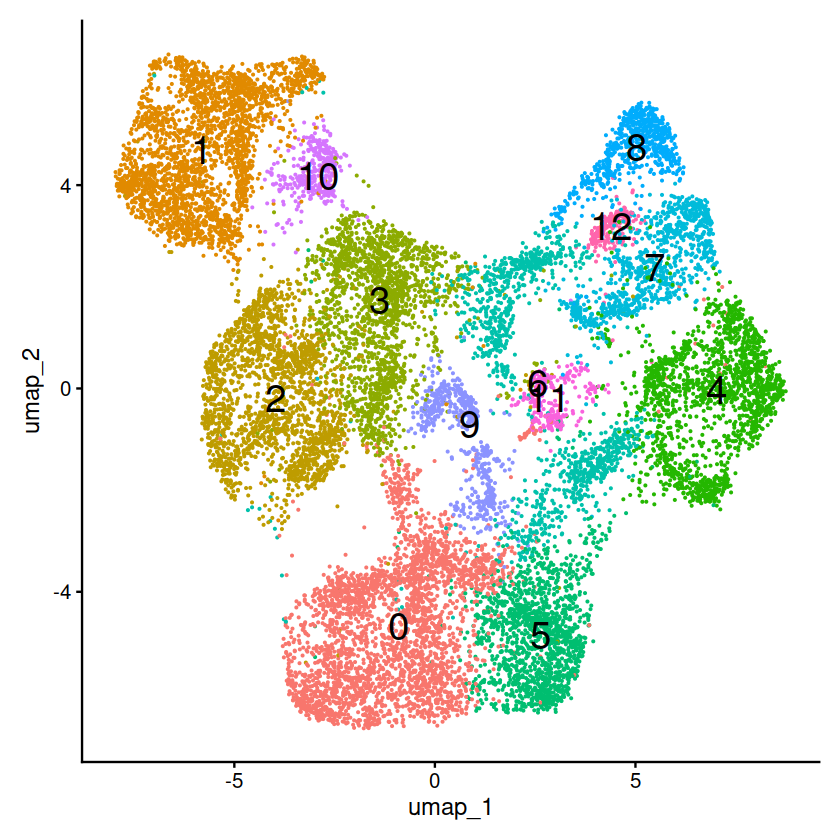

In [52]:
DimPlot(sce, reduction = 'umap', label = T, label.size = 8) + NoLegend()

In [53]:
# sce@meta.data %>% group_by(seurat_clusters, anno2) %>% reframe(count = n())
head(sce@meta.data %>% group_by(seurat_clusters, anno2) %>% reframe(count = n()), n = 0)

seurat_clusters anno2 count

In [54]:
sce@meta.data[1:2,]

orig.ident nCount_RNA nFeature_RNA species
stage23_sample3_AAACCCACAACAGAGC-1 stage23    7014       2721         chicken
stage23_sample3_AAACCCAGTCCATACA-1 stage23     872        620         chicken
                                   dataset         consensus_type
stage23_sample3_AAACCCACAACAGAGC-1 stage23_sample3 cardiomyocyte 
stage23_sample3_AAACCCAGTCCATACA-1 stage23_sample3 cardiomyocyte 
                                   integrated_snn_res.1 seurat_clusters
stage23_sample3_AAACCCACAACAGAGC-1 17                   5              
stage23_sample3_AAACCCAGTCCATACA-1 24                   4              
                                   old_clusters
stage23_sample3_AAACCCACAACAGAGC-1 3           
stage23_sample3_AAACCCAGTCCATACA-1 13          
                                   class                              
stage23_sample3_AAACCCACAACAGAGC-1 regular ventricular cardiac myocyte
stage23_sample3_AAACCCAGTCCATACA-1 regular ventricular cardiac myocyte
                                   subclass      anno2 leiden RNA_snn_res.0.5
stage23_sample3_AAACCCACAACAGAGC-1 vCM3_stressed vCM   3      5              
stage23_sample3_AAACCCAGTCCATACA-1 vCM2          vCM   5      4

In [59]:
# top markers
currcls = 6
markers <- FindMarkers(object = sce, ident.1 = currcls, only.pos = T)
head(markers)
rownames(markers)[1:50]

match('MYL7', rownames(markers))

p_val avg_log2FC pct.1 pct.2 p_val_adj
TBX3   0     3.245529   0.671 0.154 0        
BRINP3 0     4.606035   0.506 0.044 0        
HCN4   0     2.590069   0.589 0.158 0        
BMP5   0     2.003847   0.866 0.436 0        
TBX2   0     3.242920   0.404 0.053 0        
BMP2   0     3.781486   0.295 0.030 0

[1] "TBX3"               "BRINP3"             "HCN4"              
 [4] "BMP5"               "TBX2"               "BMP2"              
 [7] "GABBR2"             "SEMA3E"             "FAM135B"           
[10] "PIEZO2"             "CPNE9"              "ENSGALG00010021078"
[13] "TNFRSF19"           "GULP1"              "PDE1C"             
[16] "MSX2"               "TMEM132C"           "SNTG2"             
[19] "NSMF"               "CMSS1"              "NRG3"              
[22] "CPED1"              "PREX2"              "OTOGL"             
[25] "ENSGALG00010013519" "NLGN1"              "CACNA1H"           
[28] "TENM4"              "NTNG1"              "PLCB1"             
[31] "SNAP25"             "GRB14"              "ZNF536"            
[34] "MYO16"              "CYP26B1"            "TMEM178B"          
[37] "RYR3"               "SLC35F4"            "C8orf34"           
[40] "CSGALNACT1"         "FILIP1L"            "LMOD2"             
[43] "IL1RAPL2"           "STXBP6"             "PHLDB2"            
[46] "FGF13"              "ENSGALG00010023195" "TIMP3"             
[49] "RAB3C"              "LAMA2"

[1] NA

In [60]:
options(warn = -1)

ctypes = unique(top_markers$cluster)
df2 = data.frame(celltype = ctypes, num_markers = NA, avg_rank = NA,
                min_rank = NA, best_gene = NA, genes = NA)

for(ii in 1:length(ctypes)){
    gset = unlist(top_markers$gene[top_markers$cluster==ctypes[ii]])
    vec2 = match(gset, rownames(markers))
    df2$num_markers[ii] = sum(!is.na(vec2))
    df2$avg_rank[ii] = round(mean(vec2, na.rm = T))
    df2$min_rank[ii] = min(vec2, na.rm = T)
    df2$best_gene[ii] = rownames(markers)[df2$min_rank[ii]]
    df2$genes[ii] = paste(rownames(markers)[sort(vec2[!is.na(vec2)])], collapse = ', ')
}

df2 %>% arrange(-(num_markers)) %>% head(., 10)

celltype                                   num_markers avg_rank min_rank
1  VentricularCardiomyocytesRightTrabeculated 14          842      79      
2  VentricularCardiomyocytesLeftTrabeculated  13          545       2      
3  AtrioventricularNodePackemakerCells        13          187       1      
4  VentricularCardiomyocytesLeftCompact       12          454      69      
5  SinoatrialNodePacemakerCells               11          179       1      
6  VentricularConductionSystemDistal          11          704      79      
7  AtrialCardiomyocytesRight                  10          629       2      
8  VentricularCardiomyocytesRightCompact      10          577      79      
9  SchwannCellPrecursors                      10          473      33      
10 VentricularConductionSystemProximal         9          700      79      
   best_gene
1  CSRP3    
2  BRINP3   
3  TBX3     
4  KCNQ5    
5  TBX3     
6  CSRP3    
7  BRINP3   
8  CSRP3    
9  ZNF536   
10 CSRP3    
   genes                                                                                             
1  CSRP3, SMPX, ANKRD1, LDB3, MYH7, ZNF385D, ACTN2, KCNIP4, TNNT2, SORCS3, MYL2, SEMA5A, PRRX1, NCALD
2  BRINP3, CSRP3, SMPX, LDB3, CSMD1, MYH7, ACTN2, ADGRL2, TNNT2, MYL2, CDH13, SEMA5A, OPCML          
3  TBX3, HCN4, ZNF536, CSRP3, GREB1L, SMPX, HCN1, CACNA1D, LDB3, CAMK1D, RSPO3, ACTN2, TNNT2         
4  KCNQ5, CSRP3, SMPX, LDB3, MYH7, ACTN2, ADGRL2, TNNT2, LRMDA, TBX20, MYL2, CDH13                   
5  TBX3, HCN4, TENM4, CSRP3, SMPX, HCN1, CACNA1D, LDB3, CAMK1D, ACTN2, TNNT2                         
6  CSRP3, SMPX, LDB3, MYH7, ACTN2, TNNT2, MYL2, LPL, IRX2, OPCML, DGKG                               
7  BRINP3, CSRP3, SMPX, KIF26B, LDB3, ROR1, ACTN2, TNNT2, MYL4, NTM                                  
8  CSRP3, SMPX, ANKRD1, LDB3, MYH7, ZNF385D, ACTN2, TNNT2, MYL2, PRRX1                               
9  ZNF536, IL1RAPL2, SOX5, COL20A1, IL1RAP, CDH6, GFRA1, SLC35F1, LAMA4, PLS3                        
10 CSRP3, SMPX, LDB3, MYH7, ACTN2, TNNT2, MYL2, LPL, PHACTR1

In [ ]:
# 5,14 is v-right-trab, 2,17 is v-left-trab, 26 is v-right-trab
# 6 is VCS_distal, 7 is VCS_proximal, 22,24 is SAN-P, 11 is vCM or pacemaker